In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
from urllib.request import urlopen

url="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201004"

page=urlopen(url)
soup=BeautifulSoup(page,"html.parser")

soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20201004" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [4]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=195975" title="브레이크 더 사일런스: 더 무비">브레이크 더 사일런스: 더 무비</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=85825" title="톰보이">톰보이</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10173" title="사랑과 영혼">사랑과 영혼</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=17942" title="제리 맥과이어">제리 맥과이어</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=17970" title="샤인">샤인</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=195450" title="아웃포스트">아웃포스트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=177335" title="타샤 튜더">타샤 튜더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183866" title="담보">담보</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183772" title="극장판 짱구는 못말려: 신혼여행 허리케인

In [5]:
soup.find_all('div','tit5')[0].a.string

'소년시절의 너'

In [6]:
soup.find_all('td','point')[0].string

'9.39'

In [7]:
date=pd.date_range('2019-9-1',periods=36,freq='D')
date

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
import urllib
from tqdm import tqdm_notebook

movie_date=[]
movie_name=[]
movie_point=[]

for today in tqdm_notebook(date):

    html="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"

    response=urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup=BeautifulSoup(response,"html.parser")

    end=len(soup.find_all('td','point'))
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0,end)])


<ipython-input-8-0bfa49fb1850>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


In [9]:
movie=pd.DataFrame({'date':movie_date,'name':movie_name,'point':movie_point})

movie.head()

,date,name,point
0,2019-09-01,주전장,9.53
1,2019-09-01,알라딘,9.40
2,2019-09-01,살인의 추억,9.38
3,2019-09-01,교회오빠,9.27
4,2019-09-01,레드슈즈,9.26


In [10]:
tmp=movie.query('name==["알라딘"]')
tmp.head()

,date,name,point
1,2019-09-01,알라딘,9.40
40,2019-09-02,알라딘,9.39
83,2019-09-03,알라딘,9.39
127,2019-09-04,알라딘,9.39
169,2019-09-05,알라딘,9.39


No handles with labels found to put in legend.


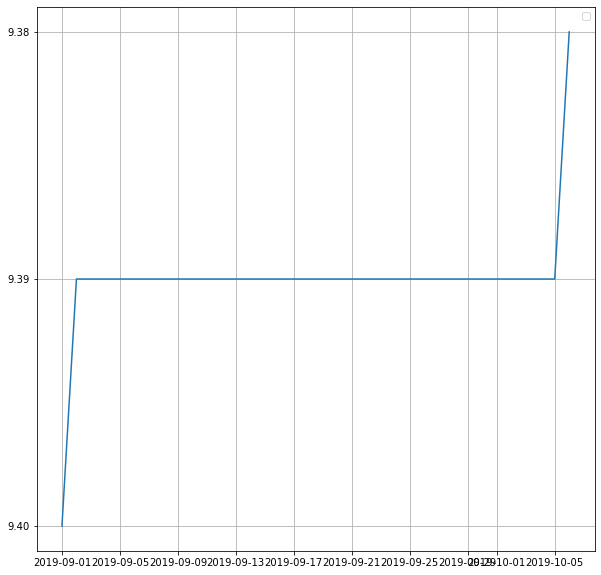

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.plot(tmp['date'],tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()